                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     460.5
Date:                Tue, 18 Sep 2018   Prob (F-statistic):           2.85e-14
Time:                        11:43:55   Log-Likelihood:                -31.374
No. Observations:                  20   AIC:                             66.75
Df Residuals:                      18   BIC:                             68.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9495      0.934     -1.017      0.3

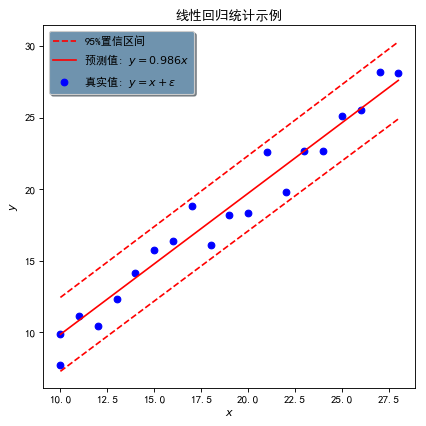

In [9]:
# -*- coding:UTF-8 -*-
# 统计模型 
# review 20180918 12:14
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
# 计算预测结果的标准差和置信区间
from statsmodels.sandbox.regression.predstd import wls_prediction_std

def linearModel(data):
    '''
    param data DataFrame
    return 
    '''
    features = ['x'] # DataFrame 类型
    label = ['y']
    y = data[label]
    x = sm.add_constant(data[features]) # 在增广矩阵前加入1列
    res = trainModel(x,y) # ?
    modelSummary(res)
    resNew = trainModel(data[features],y)
    print(resNew.summary())
    visualizeModel(resNew,data,features,label)

def trainModel(x,y):
    model = sm.OLS(y,x)
    res = model.fit()
    return res 

def modelSummary(res):
    #这个相当于t_test的结果，t_test只能做单个变量的假设检验
    '''
    param res 拟合过的最小化二乘模型
    return 报告
    '''
    print(res.summary())
    print("检验假设x的系数等于0：".center(70,'-')) # f_test能做单个变量和多个变量的检验,F检验法
    print(res.f_test('x=0')) # x=0?
    print()
    print("检测假设const的系数等于0：".center(70,'-'))
    print(res.f_test('const=0')) # b:const=0?
    print()
    print("检测假设x的系数等于1和const的系数等于0同时成立：".center(70,'-'))
    print(res.f_test(['x=1','const=0']))
    print()
    
def visualizeModel(res,data,features,label):
    prstd,prelow,preup = wls_prediction_std(res,alpha=0.05) # 标准差 置信区间上下界
    plt.rcParams['font.sans-serif']=['SimHei'] # 显示中文
    fig = plt.figure(figsize=(6,6),dpi=80)
    ax = fig.add_subplot(111)
    ax.set_title('%s' % '线性回归统计示例')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.scatter(data[features], 
               data[label], 
               color='b',
               label='%s: $y = x + \epsilon$' % "真实值")
    
    ax.plot(data[features], 
            preup, 
            "r--", 
            label='%s' % "95%置信区间") # "95%置信区间" 上届
    
    ax.plot(data[features],
            prelow,
            'r--') #  "95%置信区间" 下届
    
    ax.plot(data[features], 
            res.predict(data[features]), 
            color='r',
            label=u'%s: $y = %.3fx$'% ("预测值", res.params[features]))
    # legend = plt.legend(shadow=True) legend.get_frame().set_facecolor('rgb')
    plt.legend(shadow=True).get_frame().set_facecolor('#6F93AE')

if __name__ == '__main__':
    data = pd.read_csv('simple_example.csv')
    linearModel(data)

